### US Border Crossing - EDA
<p> https://www.kaggle.com/lauriandwu/us-border-crossing-eda/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\Courses&Certifications\\Python\\Kaggle\\Border_Crossing_Entry_Data.csv')
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


#### Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  object
 4   Date       355511 non-null  object
 5   Measure    355511 non-null  object
 6   Value      355511 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.0+ MB


In [4]:
df.Measure.unique()

array(['Personal Vehicle Passengers', 'Personal Vehicles',
       'Truck Containers Empty', 'Truck Containers Full', 'Trucks',
       'Bus Passengers', 'Buses', 'Pedestrians', 'Rail Containers Empty',
       'Rail Containers Full', 'Train Passengers', 'Trains'], dtype=object)

In [5]:
df.Border.unique()

array(['US-Canada Border', 'US-Mexico Border'], dtype=object)

In [6]:
df.isna().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

In [7]:
# Change type of Date column from object to time
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [8]:
# Filter dataframe to have only passengers (no Vehicles)
df2 = df[df['Measure'].isin(['Personal Vehicle Passengers', 'Bus Passengers', 'Train Passengers', 'Pedestrians'])]
df2.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414
5,Alexandria Bay,NY,708,US-Canada Border,2020-02-01,Bus Passengers,1174
7,Alexandria Bay,NY,708,US-Canada Border,2020-02-01,Personal Vehicle Passengers,68630
12,Algonac,MI,3814,US-Canada Border,2020-02-01,Personal Vehicle Passengers,5173
14,Ambrose,ND,3410,US-Canada Border,2020-02-01,Personal Vehicle Passengers,274


In [11]:
# Show passenger Count By Border
df_passengers_total = df2.groupby(['Border']).agg({'Value': 'sum'})
df_passengers_total

,Value
Border,
US-Canada Border,1682036237
US-Mexico Border,5190058574


array([<AxesSubplot:ylabel='Value'>], dtype=object)

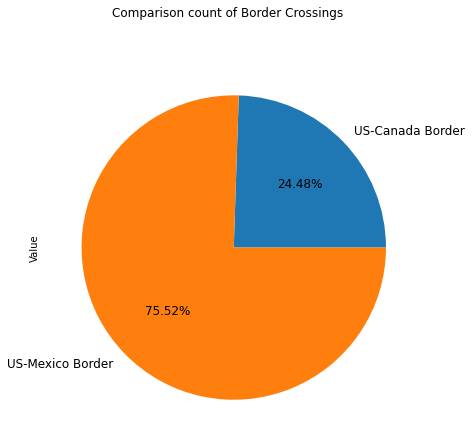

In [14]:
# Plot % Passengers Count by Border
df_passengers_total.plot(kind='pie', subplots=True, legend=False, autopct= '%.2f%%', figsize=(7,7), 
                        title='Comparison count of Border Crossings', fontsize=12)
plt.show()

In [15]:
# Show passenger Count By Measure of Crossing and by Border
df_measure = df2.groupby(['Border', 'Measure']).agg({'Value': 'sum'})
df_measure

Value
Border           Measure                                
US-Canada Border Bus Passengers                 75934445
                 Pedestrians                    13474580
                 Personal Vehicle Passengers  1586449974
                 Train Passengers                6177238
US-Mexico Border Bus Passengers                 70092929
                 Pedestrians                  1076593384
                 Personal Vehicle Passengers  4043076782
                 Train Passengers                 295479

<Figure size 864x504 with 0 Axes>

<AxesSubplot:xlabel='Border', ylabel='Value'>

Text(0.5, 1.0, 'Measures of Border Crossing - by Border')

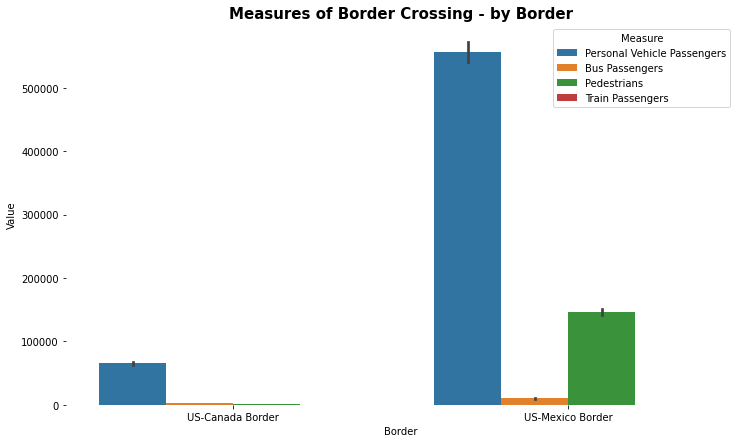

In [16]:
# Plot passenger Count By Measure of Crossing and by Border
plt.figure(figsize=(12, 7))
sns.barplot(data=df2, x="Border", y='Value', hue='Measure')
plt.box(False)
plt.title('Measures of Border Crossing - by Border', fontweight='bold', fontsize=15)
plt.show()

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Border', ylabel='Value'>

Text(0.5, 1.0, 'Crossings By all Measures and By Border')

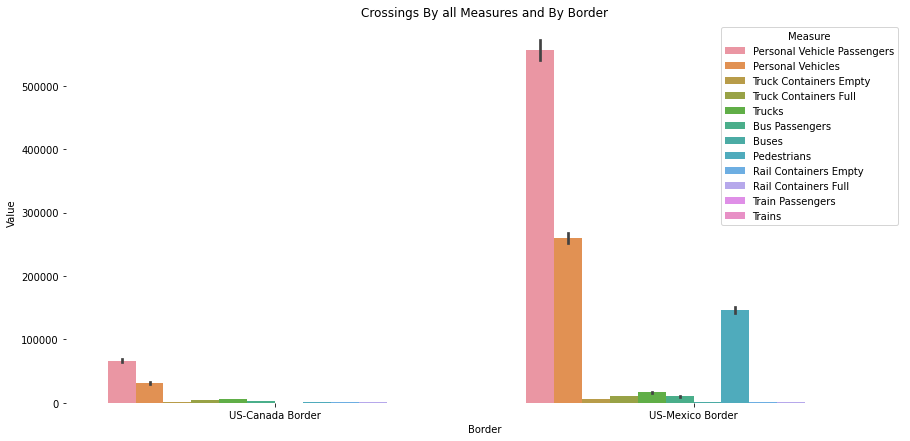

In [18]:
# Plotting all Crossings by Measure and by Border
plt.figure(figsize=(15, 7))
plt.box(False)
sns.barplot(data=df, x="Border", y='Value', hue='Measure')
plt.title('Crossings By all Measures and By Border')
plt.show()

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Value'>

Text(0.5, 1.0, 'Border Crossings throughout Time - Passengers & Vehicles')

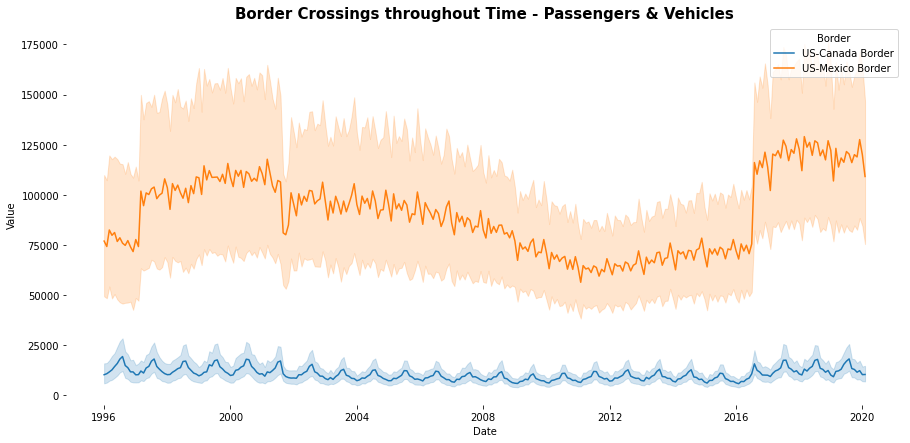

In [19]:
# plotting Border Crossings throughout Time - Passengers + Vehicles
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='Date',y='Value', hue='Border')
plt.box(False)
plt.title('Border Crossings throughout Time - Passengers & Vehicles', fontweight='bold', fontsize=15)

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Date', ylabel='Value'>

Text(0.5, 1.0, 'Border Crossings throughout Time - only Passengers')

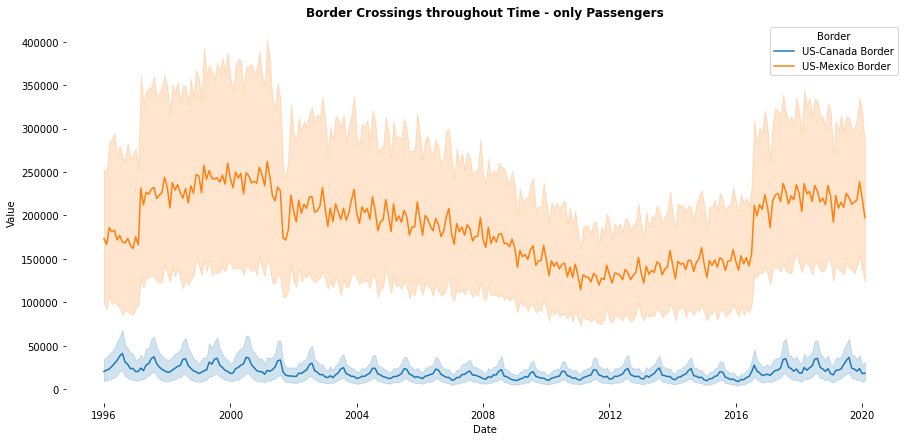

In [20]:
# plotting Border Crossings throughout Time - only Passengers
plt.figure(figsize=(15,7))
sns.lineplot(data=df2, x='Date',y='Value', hue='Border')
plt.box(False)
plt.title('Border Crossings throughout Time - only Passengers', fontweight='bold')